[View in Colaboratory](https://colab.research.google.com/github/luanfsf/estd_shell_sort/blob/master/ShellSort.ipynb)

# Shell Sort

---

### Descrição

Shell sort é um algoritmo de ordenação in-place, baseado na ordenação por inserção.

### Sobre

**Criador**: Donald Shell (Cientista da computação, Ph.D. em matemática)

**Ano de públicação**: 1959

### Aplicações

Está presente no kernel do linux;

É implementado na função __qsort__ da biblioteca padrão de C desenvolvida para sistemas embarcados.

---

# Funcionamento
O método de Shell é uma generalização da ordenação por inserção, que progressivamente ordena pares separados por um intervalo*, o qual é reduzido até que o tamanho do intervalo seja 1, onde é garantido que a lista estará ordenada ao fim da execução do método.

 
$*$Existem várias propostas de algoritmos para definir o tamanho do intervalo, também chamado de *Gap sequences*, pois, a performance do Shell sort é bastante dependente deste intervalo

### * Complexidade

Complexidade de tempo:

| $\Omega$ Melhor | $\Theta$ Médio | $O$ Pior |
|:----:|:----:|:----:|
|  $$\Omega (n \space log(n))$$ |	$$ \Theta ( n(log(n))^2 )$$  | $$O( n(log(n))^2)$$ |

Complexidade de spaço:

| $O$ Pior |
| :----:|
|$$O(1)$$|

Considerando a sequência N/2 on N é tamanho do vetor

[Big-O Complexity Chart](http://bigocheatsheet.com/)

---

# Visualização

| GAP = N/2 | GAP = GAP/2 | GAP = GAP/2 |
| :-------: | :---------: | :---------: |
|![Alt Text](https://media.giphy.com/media/5WJeFyHDru92Ek5VuJ/giphy.gif)|![Alt Text](https://media.giphy.com/media/dJjHG1d698xoZMJIRl/giphy.gif)|![Alt Text](https://media.giphy.com/media/azI2pOvoRUVmQI3gYK/giphy.gif)|
|![Alt Text](https://media.giphy.com/media/4N3jtUxqD0HkIsSIhK/giphy.gif)|![Alt Text](https://media.giphy.com/media/1hAWTtPsVlrj1YAzYo/giphy.gif)|![Alt Text](https://media.giphy.com/media/1zijp5R4WLfG2F5bok/giphy.gif)|


[YouTube](https://youtu.be/jHPexHsDxwQ?t=6m13s)

------

# Implementação em python

```python
def shell_sort(arr):
    n = len(arr)
    gap = n//2
    
    while gap > 0:
        y_index = gap
        while y_index < len(arr):
            y = arr[y_index]
            x_index = y_index - gap
            while x_index >= 0 and y < arr[x_index]:
                arr[x_index + gap] = arr[x_index]
                x_index = x_index - gap
            arr[x_index + gap] = y
            y_index = y_index + 1
        gap = gap//2
        
    return arr
```

[GitHub](https://github.com/keon/algorithms/blob/master/algorithms/sort/shell_sort.py)

------

In [0]:
from urllib import request
import matplotlib.pyplot as plt

# Download base algorithms from github repo
algorithms = request.urlopen(
    "https://raw.githubusercontent.com/luanfsf/estd_shell_sort/master/algorithms.py")

with open('algorithms.py','wb') as output:
  output.write(algorithms.read())

In [0]:
# Import base sorting algorithms for comparision
from algorithms import bubblesort, bubblesort2, selectionsort, shell_sort

In [0]:
tamanho = 1000

_crescente = list(range(0,tamanho))
_decrescente = list(_crescente.__reversed__())
_aleatorio = [randint(0, tamanho ** 2) for _ in range(0, tamanho)]


In [0]:
crescente, decrescente, aleatorio = [], [], []
iteracao = {}
for _ in range(1, tamanho):
    c,d,a = {},{},{}
    for function in [shell_sort,bubblesort,bubblesort2,selectionsort]:
        c[function.__name__+'_crescente'] = function(_crescente[:_])
        d[function.__name__+'_decrescente'] = function(_decrescente[:_])
        a[function.__name__+'_aleatorio'] = function(_aleatorio[:_])
    crescente.append(c)
    decrescente.append(d)
    aleatorio.append(a)

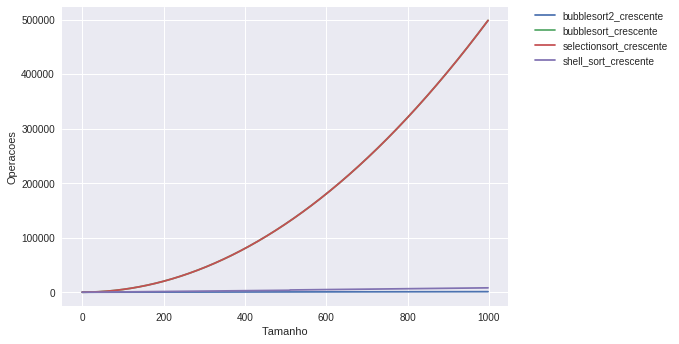

In [181]:
keys = sorted(crescente[0])
crescente_plot = plt
for element in keys:
    crescente_plot.plot([_[element] for _ in crescente], label=element)

crescente_plot.ylabel('Operacoes')
crescente_plot.xlabel('Tamanho')
crescente_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
crescente_plot.show()

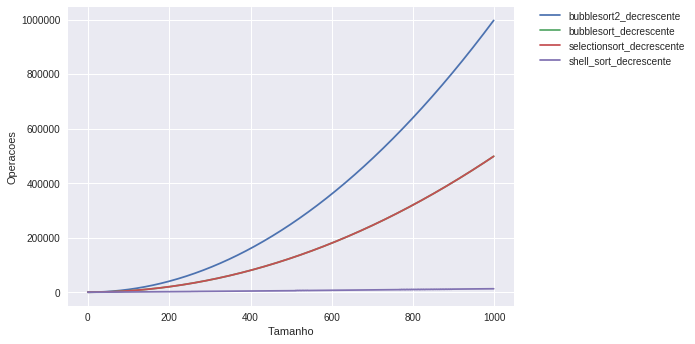

In [180]:

keys = sorted(decrescente[0])
decrescente_plot = plt
for element in keys:
    decrescente_plot.plot([_[element] for _ in decrescente], label=element)

decrescente_plot.ylabel('Operacoes')
decrescente_plot.xlabel('Tamanho')
decrescente_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
decrescente_plot.show()

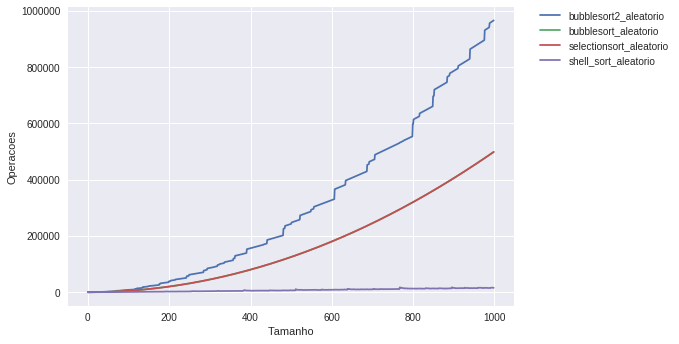

In [183]:
keys = sorted(aleatorio[0])
aleatorio_plot = plt
for element in keys:
    aleatorio_plot.plot([_[element] for _ in aleatorio], label=element)

aleatorio_plot.ylabel('Operacoes')
aleatorio_plot.xlabel('Tamanho')
aleatorio_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
aleatorio_plot.show()